# Lecture 3 - Data and Uncertainty Continues(from the part 90% bound)

In [11]:
import numpy as np
import pandas as pd

In `x`, one set of observations is one row. Get one row by indexing into `x`. First index is for the row:

## Effect of Sample Size $n$

Chebyshev's inequality says that 
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 1 - \frac{\text{Var}(\hat\mu_n)}{\epsilon^2} 
= 1- \frac{\sigma^2}{n\epsilon^2} $$

Recall that $\sigma^2=2.917$ is the variance of outcomes of dice represented as a random variable. 
Fixing the error to $\epsilon = 1$ makes the RHS a function of $n$.

In order to empirically verify Chebyshev's inequality, we will simulate the dice with a function.

In [1]:
## throw dice
def throw_dice(n=1):
    
    from numpy.random import randint
    
    return(randint(size=n, low=1, high=7))

## throw dice n times, compute mean
def muhat_n(n=1):
    
    return(throw_dice(n).mean())

Above functions return numpy arrays. We will compile results below in a bare list. Then create Pandas data frame from it (more on Pandas later). Some automatic type conversion is possible, but more strict than R.

In [4]:
n_choices = np.arange(20, 10001, 10)

results = []
for n in n_choices:
    results += [muhat_n(n)] ## appends to list

df = pd.DataFrame({
    'n_throws': n_choices,
    'muhat_n' : results,
})
df[:10]

,muhat_n,n_throws
0,3.100000,20
1,3.500000,30
2,3.450000,40
3,3.260000,50
4,3.483333,60
5,3.357143,70
6,3.412500,80
7,3.411111,90
8,3.380000,100
9,3.454545,110


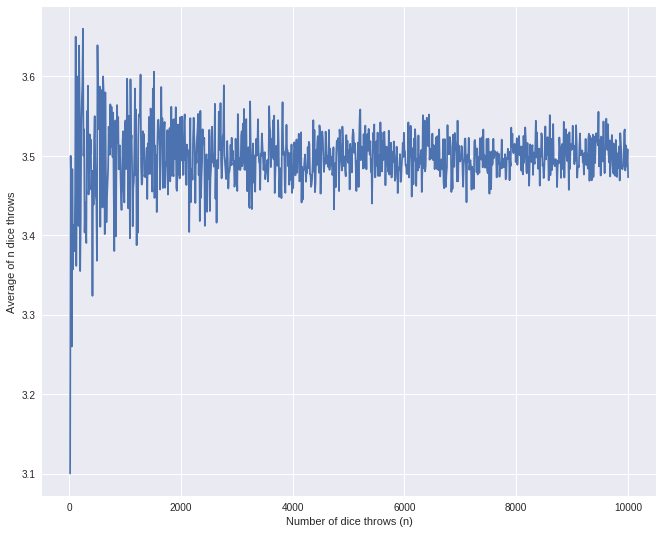

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.plot(df['n_throws'], df['muhat_n']);
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

We can build on the result by showing where 95% bound according to Chebyshev's inequality.

If we choose $\epsilon = 1$ and $n$ is fixed at 50. Then, plugging in $\sigma^2$, we get:
$$ 
1- \frac{2.917}{n\cdot \epsilon^2} = 0.95\\
\epsilon = \sqrt{\frac{2.917}{0.05\cdot n}}$$

Following computes error threshold $epsilon$ guaranteed by Chebyshev's threshold.

In [16]:
epsilon_n = np.sqrt(2.917/(0.05*n_choices))
df['epsilon'] = epsilon_n

Plot the new plot
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 0.95\\
\Pr(-\epsilon_n < \hat\mu_n - \mu < \epsilon_n)  > 0.95 $$

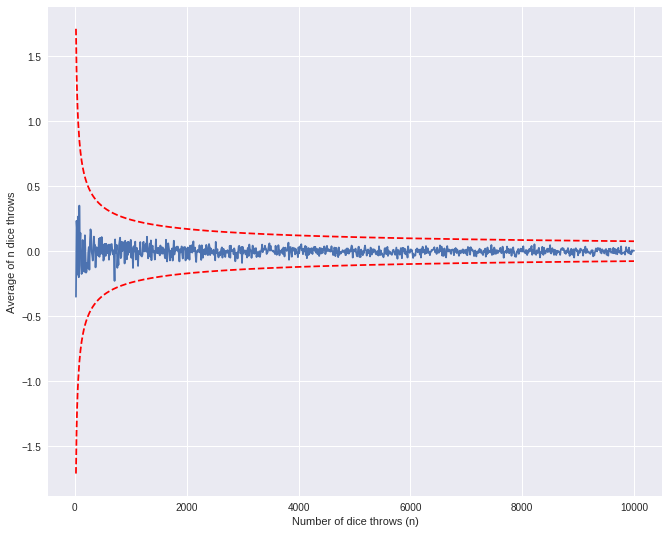

In [17]:
figsize(11, 9)
plt.plot((df['n_throws']),  df['muhat_n']-3.5);    ## subtract true mean 3.5
plt.plot((df['n_throws']),  df['epsilon'], '--r');
plt.plot((df['n_throws']), -df['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

In [18]:
## repeat computing mean of n throws s times
def repeat_muhat_n(n=1, s=100):
    
    out = [muhat_n(n) for one in range(s)]
    
    return({ 'min': min(out), 'max': max(out), 'mean': sum(out)/s})

In [19]:
repeat_muhat_n(10)

{'max': 4.5, 'mean': 3.5059999999999998, 'min': 2.2000000000000002}

In [20]:
results = []
for n in n_choices:
    results += [repeat_muhat_n(n)] ## appends to list

df_new = pd.DataFrame(results)
df_new['n_throws'] = n_choices
df_new['epsilon'] = epsilon_n
df_new[:10]

,max,mean,min,n_throws,epsilon
0,4.300000,3.520000,2.300000,20,1.707923
1,4.233333,3.512000,2.800000,30,1.394513
2,4.450000,3.508500,3.000000,40,1.207684
3,4.320000,3.503200,2.820000,50,1.080185
4,4.016667,3.516000,2.983333,60,0.986070
5,4.000000,3.495571,3.042857,70,0.912923
6,3.962500,3.486750,2.975000,80,0.853961
7,4.011111,3.497889,3.033333,90,0.805122
8,3.960000,3.464600,2.990000,100,0.763806
9,3.854545,3.505818,3.127273,110,0.728261


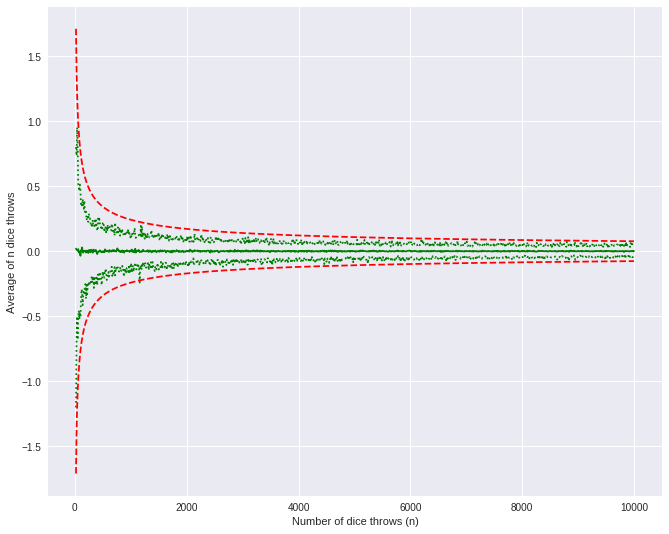

In [21]:
figsize(11, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r');
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

## Repeat for 90% bound

Plot $\epsilon$ bounds corresponding to 80% and 90% probability. Interpret these bounds.

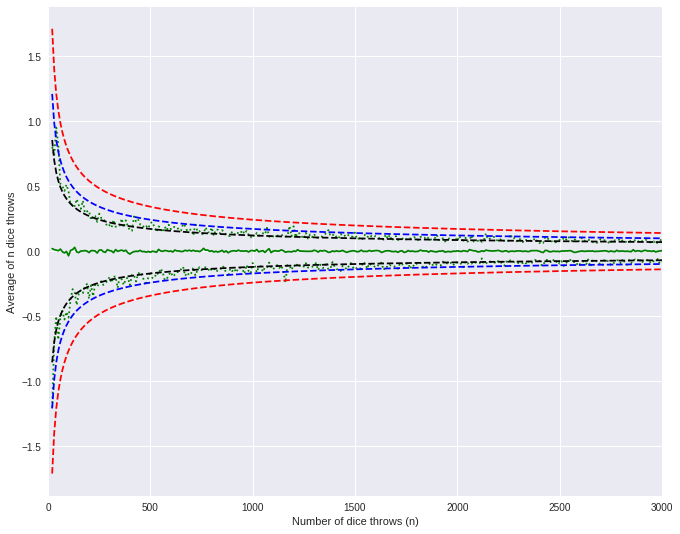

In [22]:
epsilon_n = np.sqrt(2.917/(0.1*n_choices))
df_new['epsilon_10'] = epsilon_n

epsilon_n = np.sqrt(2.917/(0.2*n_choices))
df_new['epsilon_20'] = epsilon_n

figsize(11, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r')
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r')
plt.plot((df_new['n_throws']),  df_new['epsilon_10'], '--b')
plt.plot((df_new['n_throws']), -df_new['epsilon_10'], '--b')
plt.plot((df_new['n_throws']),  df_new['epsilon_20'], '--k')
plt.plot((df_new['n_throws']), -df_new['epsilon_20'], '--k')
plt.xlim(0, 3000)
plt.xlabel("Number of dice throws (n)")
plt.ylabel("Average of n dice throws")
plt.show()

## Sampling from distribution vs data

In simulation, we "sample" from the distribution: i.e., observe more measurements from the true underlying process. In the dice example, sampling from the distribution (true underlying process) is equivalent to the ability to execute the function `throw_dice()`. However, in real-world scenarios, we may not have that luxury: e.g., only be able to record some real dice 1000 times.

In this section, we simulate such situation. There is some loaded dice with pmf as follows:

|Outcome: $x$|1     |2     |3     |4     |5     |6     |
|---------   |---   |---   |---   |---   |---   |---   |
|$\Pr(X=x)$  |1/12  |2/12  |2/12  |2/12  |2/12  |3/12  |

Function for throwing such dice can be written as follows:

In [7]:
def throw_loaded_dice(n=1): #Now the dice is "unfair" with different probability for different outcome
    from numpy.random import choice
    
    d = [1, 2,2, 3,3, 4,4, 5,5, 6,6,6]
    return(choice(d, n, replace=True))

What `d` represents is if one were to throw dice 12 times, one would get 1 exactly once, 2 exactly twice, 3 exactly twice, $\dots$, 6 exactly three times. In terms of proportion (out of 12 times), you get exactly $\Pr(X=x)$.

Now we 'throw' the dice 10,000 times:

In [8]:
data = throw_loaded_dice(100000)

In real-world situations, we may not have access to the real dice; however, we are given record of 100000 dice throws.

In this case, we can _resample with replacement_ from the data. The data is our _empirical dice_ since we have 10,000 throws, each adding to count of one of the numbers 1 through 6.

We can use the following function to sample from our _data_ instead:

In [9]:
def choose_from_data(n=1, data_in=None):
    from numpy.random import choice
    
    return(choice(data_in, n, replace=True))

Let's sample from `data` 1000 times:

In [10]:
pseudo_data = choose_from_data(1000, data)

We can compare the distribution of the _true_ pmf, _empirical_ pmf, and _resampled_ pmf

In [27]:
outcome, data_counts = np.unique(data, return_counts=True)
outcome, resample_counts = np.unique(pseudo_data, return_counts=True)

pmfs = pd.DataFrame({
    'outcome': np.arange(1, 7),
    'true_pmf': np.array([1, 2, 2, 2, 2, 3])/12,
    'empirical_pmf': data_counts/sum(data_counts),
    'resample_pmf': resample_counts/sum(resample_counts),
}, columns=['outcome','true_pmf','empirical_pmf','resample_pmf'])

pmfs

,outcome,true_pmf,empirical_pmf,resample_pmf
0,1,0.083333,0.08516,0.083
1,2,0.166667,0.16641,0.166
2,3,0.166667,0.16519,0.185
3,4,0.166667,0.16681,0.172
4,5,0.166667,0.16710,0.160
5,6,0.250000,0.24933,0.234


Above experiment shows that empirical pmf (from "data")and resample pmf (from "pesudo-data") are similar to the truth. This is the basis for using **resampled** data (such as bootstrap) for estimating sampling distributions, etc. 

bootstrap: resample the data by repeataly taking subset from the original data and compute mean and variance for estimating sampling distributions.